In [53]:
import numpy as np
import pandas as pd
import seaborn
import sklearn.compose
from matplotlib import pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import *

In [54]:
df = pd.read_csv("data_set/Automobile_data.csv")
df
df = df.replace('?', None)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,None,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,None,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,None,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [55]:
def get_mean(df, group, col):
    result = {}
    for i, r in df.iterrows():
        if r[col] is None:
            continue
        if r[group] not in result:
            result[r[group]] = np.array([])
        result[r[group]] = np.append(result[r[group]], [float(r[col])])
    for group, values in result.items():
        result[group] = np.mean(result[group])

    return result


mean_curb = get_mean(df, "curb-weight", "price")
mean_value = get_mean(df, "symboling", "normalized-losses")
print(mean_curb)
print(mean_value)

{2548: 14997.5, 2823: 16500.0, 2337: 10367.5, 2824: 17450.0, 2507: 15250.0, 2844: 17710.0, 2954: 18920.0, 3086: 23875.0, 2395: 16677.5, 2710: 20970.0, 2765: 21105.0, 3055: 24565.0, 3230: 21600.0, 3380: 41315.0, 3505: 36880.0, 1488: 5151.0, 1874: 6295.0, 1909: 6575.0, 1876: 5974.5, 2128: 7957.0, 1967: 6229.0, 1989: 6997.666666666667, 2191: 8083.5, 2535: 8921.0, 2811: 12964.0, 1713: 6479.0, 1819: 6855.0, 1837: 5399.0, 1940: 6529.0, 1956: 7129.0, 2010: 7295.0, 2024: 7322.0, 2236: 7895.0, 2289: 9095.0, 2304: 8845.0, 2372: 10295.0, 2465: 12945.0, 2293: 10345.0, 2734: 11048.0, 4066: 33900.0, 3950: 36000.0, 1890: 5195.0, 1900: 6095.0, 1905: 6795.0, 1945: 6695.0, 1950: 7395.0, 2380: 11395.0, 2385: 10579.5, 2500: 15645.0, 2410: 9370.0, 2443: 10795.0, 2425: 11245.0, 2670: 18280.0, 2700: 18344.0, 3515: 25552.0, 3750: 28248.0, 3495: 28176.0, 3770: 31600.0, 3740: 34184.0, 3685: 35056.0, 3900: 40960.0, 3715: 45400.0, 2910: 16503.0, 1918: 5870.0, 1944: 6189.0, 2004: 6669.0, 2145: 7407.5, 2370: 9959.0

In [56]:
def change_mean(r):
    if r["normalized-losses"] is None:
        item = r["symboling"]
        r["normalized-losses"] = mean_value[item]
    if r["price"] is None:
        r["price"] = mean_curb[r["curb-weight"]] if r["curb-weight"] in mean_curb else None
    return r


filtered_data = df.apply(lambda row: change_mean(row), axis=1).dropna()
filtered_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,168.647059,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168.647059,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,128.574468,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [57]:
transformed_data = filtered_data

transformed_data['symboling'] = MinMaxScaler().fit_transform(transformed_data['symboling'].values.reshape((-1, 1)))

for columns_name in ['price', 'normalized-losses']:
    transformed_data[columns_name] = transformed_data[columns_name].apply(lambda x: float(x))

for columns_name in ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system', 'num-of-cylinders']:
    transformed_data[columns_name] = LabelEncoder().fit_transform(transformed_data[columns_name].values)

transformed_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,168.647059,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,4,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1.0,168.647059,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,4,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0.6,128.574468,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,4,3,152,4,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0.8,164.000000,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,2,2,109,4,3.19,3.4,10.0,102,5500,24,30,13950.0
4,0.8,164.000000,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136,4,3.19,3.4,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,95.000000,20,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,2,2,141,4,3.78,3.15,9.5,114,5400,23,28,16845.0
201,0.2,95.000000,20,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,2,2,141,4,3.78,3.15,8.7,160,5300,19,25,19045.0
202,0.2,95.000000,20,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,4,3,173,4,3.58,2.87,8.8,134,5500,18,23,21485.0
203,0.2,95.000000,20,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,2,3,145,2,3.01,3.4,23.0,106,4800,26,27,22470.0


In [58]:
cleaned_auto_data = transformed_data[filtered_data.price < filtered_data.price.quantile(0.9)]
cleaned_auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,168.647059,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,4,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1.0,168.647059,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,4,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0.6,128.574468,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,4,3,152,4,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0.8,164.000000,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,2,2,109,4,3.19,3.4,10.0,102,5500,24,30,13950.0
4,0.8,164.000000,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136,4,3.19,3.4,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.2,74.000000,20,1,1,0,4,2,0,104.3,188.8,67.2,57.5,3157,2,2,130,4,3.62,3.15,7.5,162,5100,17,22,18950.0
200,0.2,95.000000,20,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,2,2,141,4,3.78,3.15,9.5,114,5400,23,28,16845.0
201,0.2,95.000000,20,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,2,2,141,4,3.78,3.15,8.7,160,5300,19,25,19045.0
202,0.2,95.000000,20,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,4,3,173,4,3.58,2.87,8.8,134,5500,18,23,21485.0


In [59]:
columns_array = transformed_data.columns

selection = VarianceThreshold(threshold=(0.5))
selected_dataf = selection.fit_transform(cleaned_auto_data.drop(["price"], axis=1), cleaned_auto_data["price"])

features = selection.get_feature_names_out(columns_array[:len(columns_array) - 1])
selected_dataf = pd.DataFrame(selected_dataf, columns=features)
deleted_features = np.array([], dtype=str)

for feature in columns_array[:len(columns_array) - 1]:
    if feature not in features:
        deleted_features = np.append(deleted_features, feature)

pd.DataFrame(features)
pd.DataFrame(deleted_features)
selected_dataf

,normalized-losses,make,body-style,wheel-base,length,width,height,curb-weight,engine-type,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,168.647059,0,0,88.6,168.8,64.1,48.8,2548,0,130,4,9.0,111,5000,21,27
1,168.647059,0,0,88.6,168.8,64.1,48.8,2548,0,130,4,9.0,111,5000,21,27
2,128.574468,0,2,94.5,171.2,65.5,52.4,2823,4,152,4,9.0,154,5000,19,26
3,164.0,1,3,99.8,176.6,66.2,54.3,2337,2,109,4,10.0,102,5500,24,30
4,164.0,1,3,99.4,176.6,66.4,54.3,2824,2,136,4,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,74.0,20,4,104.3,188.8,67.2,57.5,3157,2,130,4,7.5,162,5100,17,22
171,95.0,20,3,109.1,188.8,68.9,55.5,2952,2,141,4,9.5,114,5400,23,28
172,95.0,20,3,109.1,188.8,68.8,55.5,3049,2,141,4,8.7,160,5300,19,25
173,95.0,20,3,109.1,188.8,68.9,55.5,3012,4,173,4,8.8,134,5500,18,23


In [60]:
kbest = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.chi2, k=5)
transformed_data_kbest = kbest.fit_transform(cleaned_auto_data.drop(["price"], axis=1),
                                             cleaned_auto_data["price"])

features = kbest.get_feature_names_out(columns_array[:len(columns_array) - 1])
transformed_data_kbest = pd.DataFrame(transformed_data_kbest, columns=features)
transformed_data_kbest

,normalized-losses,curb-weight,engine-size,horsepower,peak-rpm
0,168.647059,2548,130,111,5000
1,168.647059,2548,130,111,5000
2,128.574468,2823,152,154,5000
3,164.0,2337,109,102,5500
4,164.0,2824,136,115,5500
...,...,...,...,...,...
170,74.0,3157,130,162,5100
171,95.0,2952,141,114,5400
172,95.0,3049,141,160,5300
173,95.0,3012,173,134,5500


In [61]:
tree_classifier = sklearn.ensemble.RandomForestRegressor(n_estimators=50)
tree_classifier.fit(cleaned_auto_data.drop(["price"], axis=1),
                    cleaned_auto_data["price"])
model = sklearn.feature_selection.SelectFromModel(tree_classifier, prefit=True)
forest_selected_data = model.transform(cleaned_auto_data.drop(["price"], axis=1))
forest_selected_data

D:\Python\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([[2548, '111', 27],
       [2548, '111', 27],
       [2823, '154', 26],
       [2337, '102', 30],
       [2824, '115', 22],
       [2507, '110', 25],
       [2844, '110', 25],
       [2954, '110', 25],
       [2395, '101', 29],
       [2395, '101', 29],
       [2710, '121', 28],
       [2765, '121', 28],
       [1488, '48', 53],
       [1874, '70', 43],
       [1909, '70', 43],
       [1876, '68', 41],
       [1876, '68', 38],
       [2128, '102', 30],
       [1967, '68', 38],
       [1989, '68', 38],
       [1989, '68', 38],
       [2535, '88', 30],
       [2811, '145', 24],
       [1713, '58', 54],
       [1819, '76', 38],
       [1837, '60', 42],
       [1940, '76', 34],
       [1956, '76', 34],
       [2010, '76', 34],
       [2024, '76', 34],
       [2236, '86', 33],
       [2289, '86', 33],
       [2304, '86', 33],
       [2372, '86', 33],
       [2465, '101', 28],
       [2293, '100', 31],
       [2337, '78', 29],
       [1874, '70', 43],
       [1909, '70', 43],
       [2

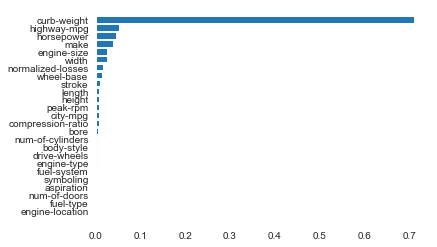

In [62]:
feature_importances = tree_classifier.feature_importances_
indices = np.argsort(feature_importances)
plt.yticks(range(len(indices)), np.array(cleaned_auto_data.drop(["price"], axis=1).columns)[indices])
plt.barh(range(len(indices)), feature_importances[indices])
plt.box()
plt.show()

                   symboling  normalized-losses      make  fuel-type  \
symboling           1.000000           0.559326 -0.171063   0.126148   
normalized-losses   0.559326           1.000000 -0.267316   0.075168   
make               -0.171063          -0.267316  1.000000  -0.171708   
fuel-type           0.126148           0.075168 -0.171708   1.000000   
aspiration          0.037990           0.090031  0.117604  -0.357622   
num-of-doors        0.660954           0.441778 -0.191460   0.179445   
body-style         -0.570382          -0.379165  0.126873  -0.153072   
drive-wheels       -0.076027           0.351681  0.071916  -0.124625   
wheel-base         -0.489338          -0.092452  0.255848  -0.299689   
length             -0.303138           0.019363  0.298087  -0.193083   
width              -0.172780           0.128542  0.200637  -0.205913   
height             -0.498447          -0.430914  0.287180  -0.241799   
curb-weight        -0.176028           0.166967  0.232843  -0.20

C:\Users\38073\AppData\Local\Temp\ipykernel_8552\3767675094.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = cleaned_auto_data.corr()


<AxesSubplot: >

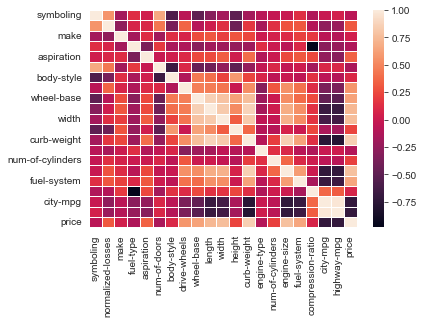

In [64]:
correlation = cleaned_auto_data.corr()
print(correlation)
seaborn.heatmap(correlation, linewidths=1)